<a href="https://colab.research.google.com/github/krzysztof-kar/ML2025/blob/main/Lab06_tree-methods_prdom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Understanding Splitting Criteria in CART for Regression**
---------------------

In this assignment, you will explore three common formulations of the splitting criterion used in **CART (Classification and Regression Trees)** for **regression problems**:

1. **Local RSS Minimization**  
2. **RSS Gain Maximization**  
3. **Total RSS Minimization**

You will investigate whether any of these criteria are equivalent, and you will design an experiment to determine which criterion is actually employed in a standard implementation such as **scikit-learn’s DecisionTreeRegressor**.



## **The Problem**

Many treatments of CART for regression describe the split selection process in different ways. Below are three frequently cited formulations. Suppose we have a dataset with features $X$ and target $y$, and we seek to choose a feature $X_j$ and a threshold $t$ to split the data into two regions $R_1(X_j, t)$ and $R_2(X_j, t)$. Denote by $\bar{y}_{R_m}$ the mean of targets within region $R_m$.

1. **Local RSS Minimization**  
   We select the feature and threshold that minimize the **sum of squared errors** in the two resulting child nodes:
   $$
   (X_j^*, t^*) = \arg\min_{X_j, t} \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2.
   $$

2. **RSS Gain Maximization**  

   It is also a local method, looking only at a parent and two child nodes.

   We select the feature and threshold that maximize the **reduction** in RSS, computed by subtracting the RSS of the two child nodes from the RSS in the parent node:
   $$
   (X_j^*, t^*) = \arg\max_{X_j, t} \Bigl\{
   \underbrace{\sum_{i : x_i \in \text{Parent}} (y_i - \bar{y})^2}_{\text{Parent RSS}}
   \;-\;
   \underbrace{\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2}_{\text{Children RSS}}
   \Bigr\}.
   $$

3. **Total RSS Minimization**  
   For a dataset $\{(x_i, y_i)\}_{i=1}^N$ with features $X$ and target $y$, let $T$ be the current tree.

   For any split on feature $X_j$ at threshold $t$, define $T(X_j, t)$ as the new tree obtained by splitting one leaf of $T$ into two leaves $R_1(X_j, t)$ and $R_2(X_j, t)$.
   
   Let $\mathrm{Leaves}(T(X_j, t))$ be the set of all leaf indices in this new tree. For each leaf $m \in \mathrm{Leaves}(T(X_j, t))$, define:
   $$
   R_m = \{\, i \,\mid\, x_i \text{ ends in leaf } m\}.
   $$

   $R_m$ set collects all data indices $i$ whose feature vector $x_i$ is classified into the leaf node $m$ when passed through the tree $T(X_j,t)$. In other words, each leaf node $m$ in $T(X_j, t)$ corresponds to a unique path of splits, and any data point $x_i$ that follows that path is assigned to the leaf $m$; hence, it belongs to $R_m$.

   $R_m$ sets for all leafs $m \in \mathrm{Leaves}(T(X_j, t))$ define a partition of all indices.

   Then the objective of **minimizing total Residual Sum of Squares (total RSS)** is stated as:
   $$
   (X_j^*, t^*) = \arg\min_{(X_j, t)} \sum_{m \in \mathrm{Leaves}(T(X_j, t))}
   \sum_{i \in R_m} \Bigl(y_i - \overline{y}_{R_m}\Bigr)^2,
   $$
   where
   $$
   \overline{y}_{R_m} = \frac{1}{\lvert R_m \rvert}
   \sum_{i \in R_m} y_i
   $$
   is the mean response in leaf $m$.


## **Research Questions**

1. **Equivalence Analysis**  
   Determine whether the above formulations are equivalent or if they can yield different split choices. Specifically:
   - Are *local RSS minimization* and *RSS gain maximization* equivalent?
   - Does *total RSS minimization* coincide with either of these two, or is it distinct?
   
2. **Empirical Experiment**  
   Design and conduct a Python experiment to determine which of these formulations is implemented in `scikit-learn` in `DecisionTreeRegressor`. Present numerical results and plots to support your conclusion.


## **Tasks & Deliverables**

1. **Formulation Analysis**  
   - Compare *local RSS minimization*, *RSS gain maximization*, and *total RSS minimization*.
   - If you find that any pair of formulations is equivalent, provide a concise proof.  
   - If you find that they differ, construct a counterexample.

2. **Empirical Verification**  
   - Create a small artificial dataset and train a `DecisionTreeRegressor` from `scikit-learn`.
   - The dataset must be designed in a way that uniquely identifies the formulation used. Provide a short code snippet and a plot or table to support your conclusion.

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.



[[ 0.64083205  0.74251532  0.8044434  ...  8.30567     8.32835468
   8.36121635]
 [ 0.64531155  0.74699482  0.8089229  ...  8.3101495   8.33283418
   8.36569585]
 [ 0.69266909  0.79435236  0.85628044 ...  8.35750704  8.38019172
   8.41305339]
 ...
 [28.63120261 28.73288587 28.79481395 ... 36.29604055 36.31872524
  36.3515869 ]
 [28.88023255 28.98191581 29.04384389 ... 36.54507049 36.56775518
  36.60061684]
 [29.59656372 29.69824699 29.76017507 ... 37.26140167 37.28408635
  37.31694802]]
X


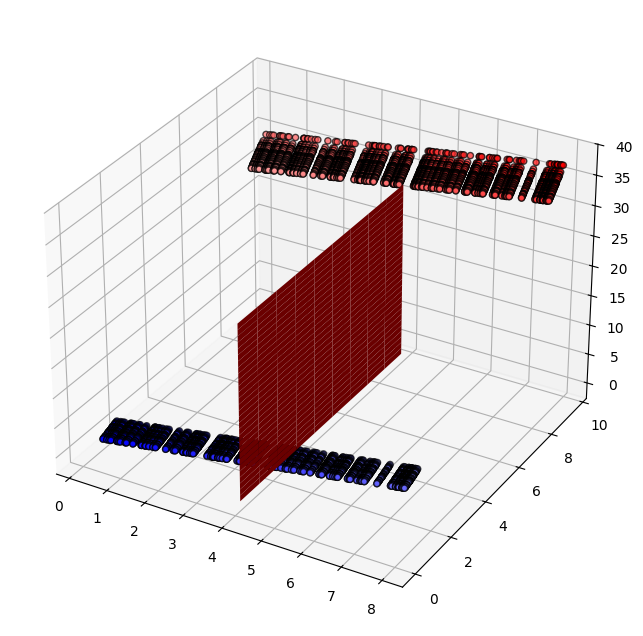

Best split at X = 4.13 with TOTAL SSR = 56032.48


In [84]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Step 1: Generate synthetic data
np.random.seed(48903125)


n_samples = 100
# X is the input features by row.
Y = np.zeros(n_samples)
Y[:n_samples//2] = np.random.normal(1, 0.2, n_samples//2)
Y[n_samples//2:] = np.random.normal(9, 0.2, n_samples//2)
Y = np.sort(Y)

X1 = np.sort((np.random.rand(100) * 8))

x1,y1 = np.meshgrid(X1,Y)

y = y1**1.5+x1 + np.random.normal(0, 0.3)  # Noisy sine wave
print(y)

# Step 2: Analyze possible splits and compute SSR
def compute_ssr(y):
    mean_y = np.mean(y)
    return np.sum((y - mean_y) ** 2)

best_ssr = float('inf')
best_split = None
ssr_list_x = []
ssr_list_y = []
chosen_variable = ""

# Consider splits between adjacent sorted X values

for i in range(1, len(X1)):
    threshold = (X1[i - 1] + X1[i]) / 2

    # Split data using boolean masks
    left_mask = X1 < threshold
    right_mask = X1 >= threshold

    # Calculate SSR for each region
    ssr_left = compute_ssr(y[left_mask])
    ssr_right = compute_ssr(y[right_mask])
    total_ssr = ssr_left + ssr_right

    ssr_list_x.append((threshold, total_ssr))

    # Keep track of the best split
    if total_ssr < best_ssr:
        best_ssr = total_ssr
        best_split = threshold
        chosen_variable = "X"

for i in range(1, len(Y)):
    threshold = (Y[i - 1] + Y[i]) / 2

    # Split data using boolean masks
    left_mask = Y < threshold
    right_mask = Y >= threshold

    # Calculate SSR for each region
    ssr_left = compute_ssr(y[left_mask])
    ssr_right = compute_ssr(y[right_mask])
    total_ssr = ssr_left + ssr_right

    ssr_list_y.append((threshold, total_ssr))

    # Keep track of the best split
    if total_ssr < best_ssr:
        best_ssr = total_ssr
        best_split = threshold
        chosen_variable = "Y"
print(chosen_variable)
# Visualize the data, splits, and the best split along with SSR values
#fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)  # Two vertically aligned subplots

ax.scatter(x1, y1, y, c=y, cmap='bwr', edgecolors='k', s=20, alpha=0.7, label='Data Points')


# First subplot: Original data with split lines
#axes[0].scatter(x1,y1, y, color='blue', label='Data Points', s=30)


yy, zz = np.meshgrid(range(10), range(30))
xx = yy*0+best_split

#for threshold, ssr in ssr_list:
    #ax.plot_surface(yy,zz,yy*threshold, color='gray', linestyle='--', alpha=0.2)
ax.plot_surface(xx, yy, zz, color='red', linestyle='-', linewidth=2, label=f'Best Split at x={best_split:.2f}')


plt.show()


print(f"Best split at {chosen_variable} = {best_split:.2f} with TOTAL SSR = {best_ssr:.2f}")

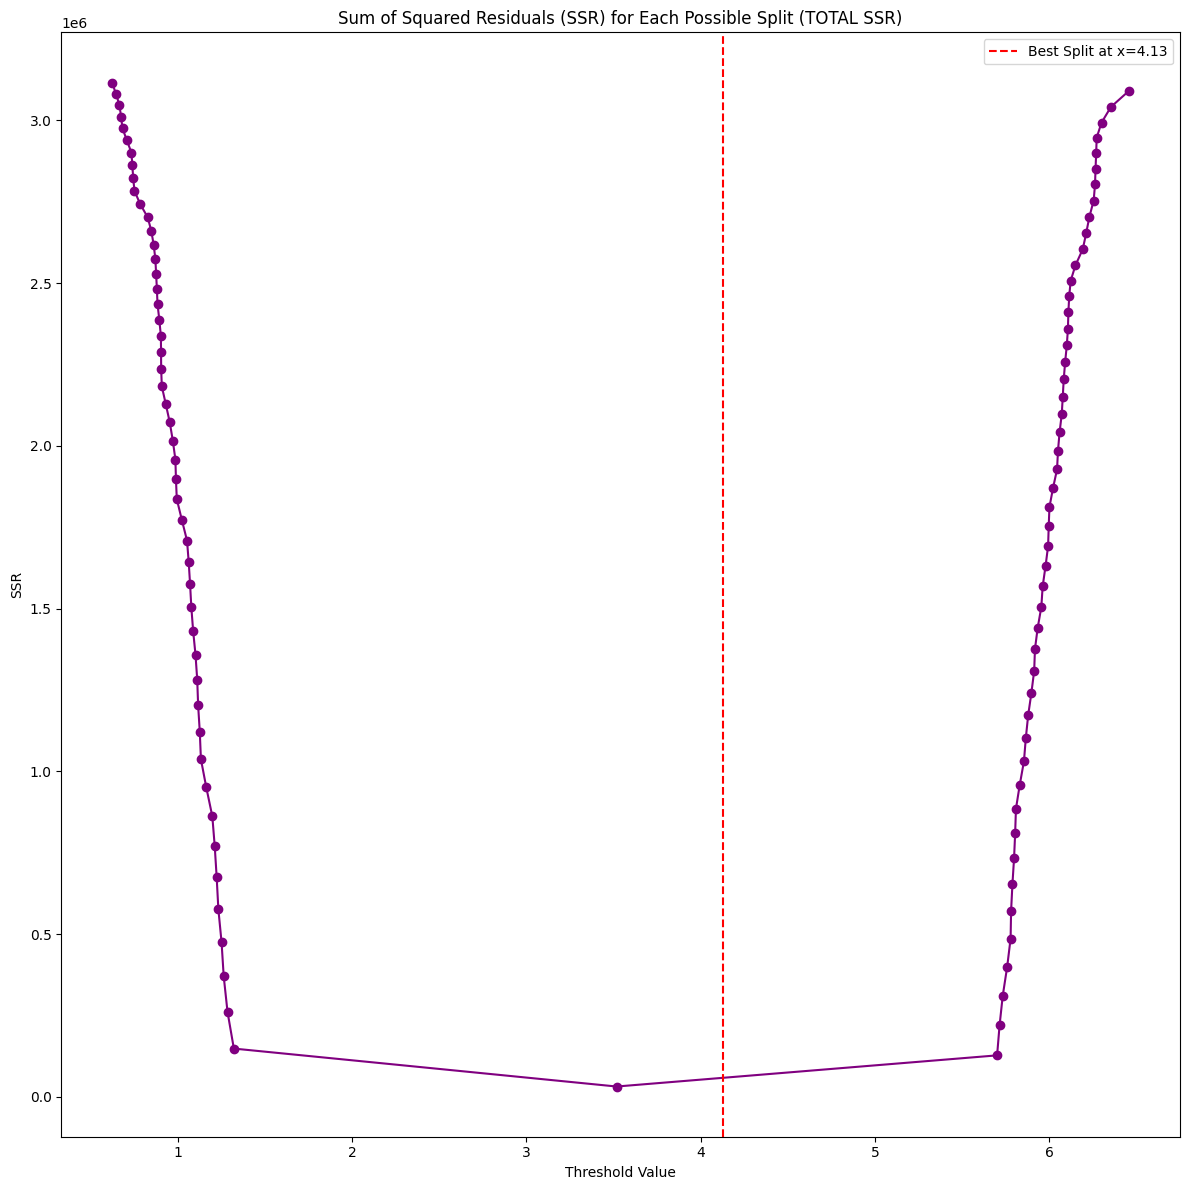

In [75]:
# Visualize the data, splits, and the best split along with SSR values
fig, axes = plt.subplots(1, 1, figsize=(12, 12))





thresholds, ssrs = zip(*ssr_list_y)
axes.plot(thresholds, ssrs, marker='o', color='purple')
axes.axvline(x=best_split, color='red', linestyle='--', label=f'Best Split at x={best_split:.2f}')
axes.set_title('Sum of Squared Residuals (SSR) for Each Possible Split (TOTAL SSR)')
axes.set_xlabel('Threshold Value')
axes.set_ylabel('SSR')
axes.legend()

# Adjust layout for better spacing
plt.tight_layout()